In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

In [ ]:
#把資料input進來
inputfile = "member.uid___A001_X2d20_X39ab.Cloverleaf_sci.spw25.cube.I.pbcor.fits-Z-profile-Region_1-Statistic_Mean-Coordinate_Current-2025-07-07-16-51-00.tsv"
df = pd.read_csv(inputfile, sep="\t", skiprows=5)

In [4]:
#整理數據名字
df.columns = [col.strip().lstrip("#").strip() for col in df.columns]

#整理數據的表示方法
df[df.columns[0]] = pd.to_numeric(df[df.columns[0]], errors="coerce")
df[df.columns[1]] = pd.to_numeric(df[df.columns[1]], errors="coerce")
df = df.dropna()

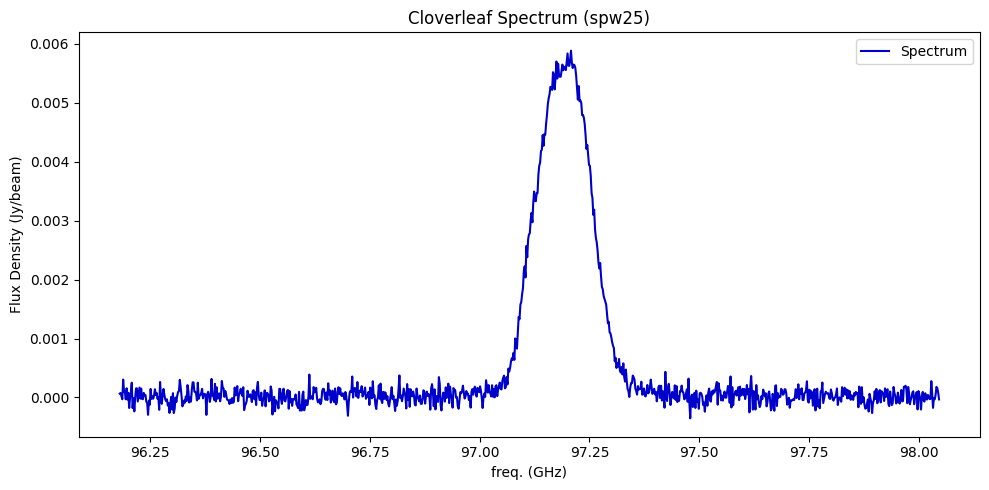

In [ ]:
#沒平滑過的
plt.figure(figsize=(10, 5))
plt.plot(df[df.columns[0]], df[df.columns[1]], label="Spectrum", color="mediumblue")
plt.xlabel("freq. (GHz)")
plt.ylabel("Flux Density (Jy/beam)")
plt.title("Cloverleaf Spectrum (spw25)")
plt.grid(False)
plt.legend()      
plt.tight_layout()
plt.show()

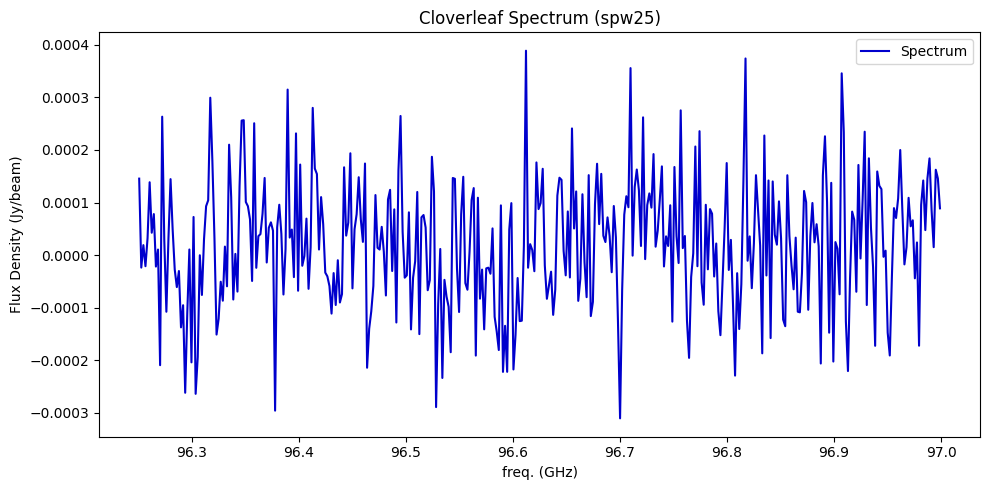

In [ ]:
plt.figure(figsize=(10, 5))

mask = (df[df.columns[0]] > 96.25) & (df[df.columns[0]] < 97)
df_limited = df[mask]
plt.plot(df_limited[df.columns[0]], df_limited[df.columns[1]],
         label="Spectrum", color="mediumblue")

plt.xlabel("freq. (GHz)")
plt.ylabel("Flux Density (Jy/beam)")
plt.title("Cloverleaf Spectrum (spw25)")
plt.grid(False)
plt.legend()      
plt.tight_layout()
plt.show()

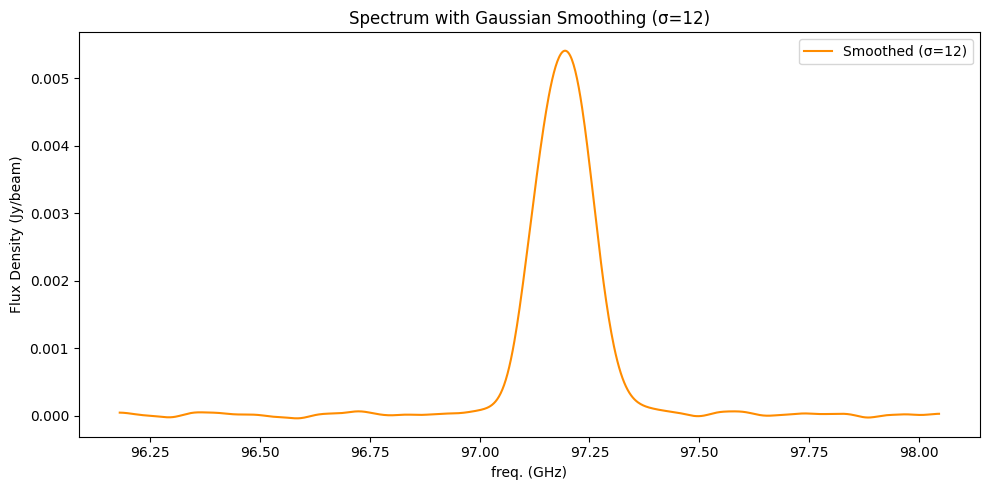

In [7]:
y_smoothed = gaussian_filter1d(df[df.columns[1]], sigma=12)

plt.figure(figsize=(10, 5))
#plt.plot(df[df.columns[0]], df[df.columns[1]], label="Original Spectrum", color="mediumblue", alpha=0.5)
plt.plot(df[df.columns[0]], y_smoothed, label="Smoothed (σ=12)", color="darkorange")
plt.xlabel("freq. (GHz)")
plt.ylabel("Flux Density (Jy/beam)")
plt.title("Spectrum with Gaussian Smoothing (σ=12)")
plt.legend()
plt.tight_layout()
plt.show()